In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y= 4+3*X + np.random.randn(100,1)

In [3]:
import matplotlib.pyplot as plt

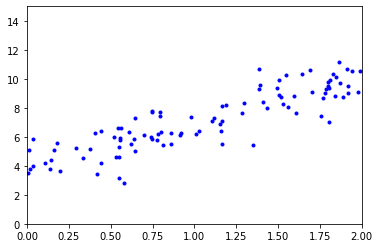

In [4]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

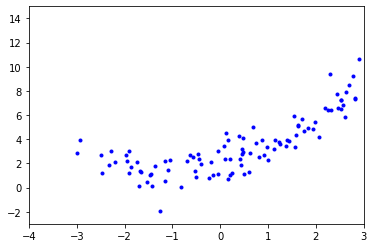

In [5]:
m=100
X = 6 * np.random.rand(m, 1) - 3
X = np.array(sorted(X))
y= 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X, y, "b.")
plt.axis([-4, 3, -3, 15])
plt.show()

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [8]:
X_poly = poly_features.fit_transform(X)

In [9]:
X_poly[0]

array([-2.98974189,  8.93855657])

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()

In [12]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [13]:
lin_reg.intercept_

array([1.98748483])

In [14]:
lin_reg.coef_

array([[0.98665678, 0.44327686]])

In [15]:
y_predict = lin_reg.predict(X_poly)

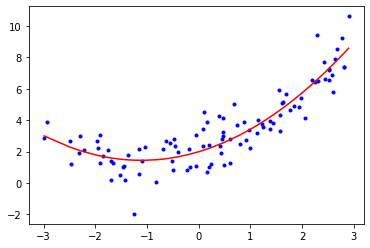

In [16]:
plt.plot(X, y, "b.")
plt.plot(X, y_predict, "r-")
# plt.axis([-4, 3, -3, 15])
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [18]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

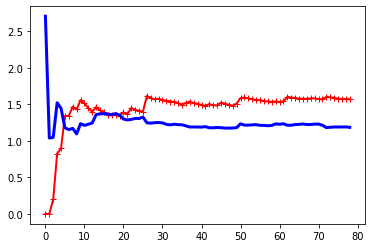

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [20]:
from sklearn.pipeline import Pipeline

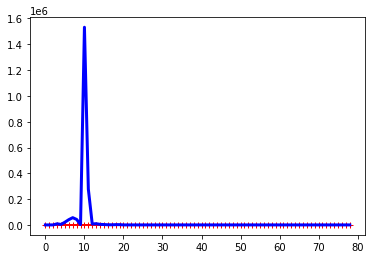

In [21]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)

In [22]:
from sklearn.linear_model import Ridge

In [23]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [24]:
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [25]:
ridge_reg.predict([[1.5]])

array([[4.804549]])

In [26]:
from sklearn.linear_model import SGDRegressor

In [27]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X,y.ravel())

SGDRegressor()

In [28]:
sgd_reg.predict([[1.5]])

array([4.79623574])

In [29]:
from sklearn import datasets

In [30]:
iris = datasets.load_iris()

In [31]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [40]:
X = iris["data"][:, 3:]

In [41]:
y = (iris["target"]==2).astype(np.int)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_reg = LogisticRegression()

In [44]:
log_reg.fit(X, y)

LogisticRegression()

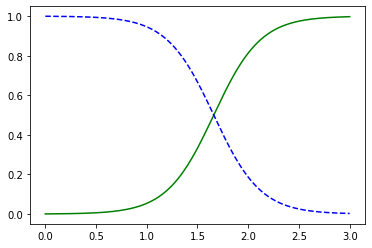

In [45]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris virginica")